In [1]:
#Importing the Necessary Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
%matplotlib inline

In [2]:
#Reding Training dataset
df=pd.read_csv('TRAIN.csv')

In [3]:
#Function to process the training dataset (Train.csv)
def processdata_train(df):
    #Dividing Date into different sub parts i.e year,months,day etc. 
    df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
    df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
    
    #One Hot Encoding:
    df = pd.get_dummies(df, columns=['Store_Type'], drop_first=True, prefix='Store_Type')
    df = pd.get_dummies(df, columns=['Location_Type'], drop_first=True, prefix='Location_Type')
    df = pd.get_dummies(df, columns=['Region_Code'], drop_first=True, prefix='Region_Code')
    df = pd.get_dummies(df, columns=['Discount'], drop_first=True, prefix='Discount')
    df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')
    df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')
    df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')
    df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')
    df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')
    
    #Dropping indentifiers and non necessary columns
    df.drop('ID',axis=1,inplace=True)
    df.drop('Store_id',axis=1,inplace=True)
    df.drop('Date', axis = 1,inplace=True)
    df.drop('#Order',axis=1,inplace=True)
    return df


#Funciton to process Test Final dataset (Test_Final.csv)
def processdata_testfinal(df):
    #Dividing Date into different sub parts i.e year,months,day etc. 
    df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
    df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
    
    #One Hot Encoding:
    df = pd.get_dummies(df, columns=['Store_Type'], drop_first=True, prefix='Store_Type')
    df = pd.get_dummies(df, columns=['Location_Type'], drop_first=True, prefix='Location_Type')
    df = pd.get_dummies(df, columns=['Region_Code'], drop_first=True, prefix='Region_Code')
    df = pd.get_dummies(df, columns=['Discount'], drop_first=True, prefix='Discount')
    df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')
    df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')
    df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')
    df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')
    df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')
    
    #Since final test dataset contains data for month of July and year of 2019 only. 
    df['month_2']=0
    df['month_3']=0
    df['month_4']=0
    df['month_5']=0
    df['month_6']=0
    df['month_8']=0
    df['month_9']=0
    df['month_10']=0
    df['month_11']=0
    df['month_12']=0
    df['qrtr_2']=0
    df['qrtr_4']=0
    df['year_2019']=1
    
    #Dropping indentifiers and non necessary columns
    df.drop('ID',axis=1,inplace=True)
    df.drop('Store_id',axis=1,inplace=True)
    df.drop('Date', axis = 1,inplace=True)
    return df

#Function to split train dataset in 80:20 train test sets.
def splitdataset(df):
    split_point=int(len(df)*0.8)
    train, test = df[0:split_point], df[split_point:]
    print("Shape of Train set :{}".format(train.shape))
    print("Shape of Test set :{}".format(test.shape))
    return train,test

#Function to get features and labels of dataset.
def getXYtrain(df,targetcolumn):
    predictors = list(set(list(df.columns))-set(targetcolumn))
    X = df[predictors].values
    y = df[targetcolumn].values
    print(X.shape)
    print(y.shape)
    return X,y

#Function to get feature set of dataset
def getX(df,targetcolumn):
    predictors = list(set(list(df.columns))-set(targetcolumn))
    X = df[predictors].values
    print(X.shape)
    return X


In [4]:
df.shape

(188340, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

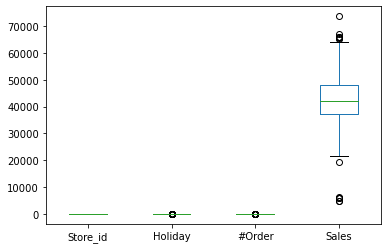

In [7]:
df.set_index('Date').groupby('Date').mean().plot.box()

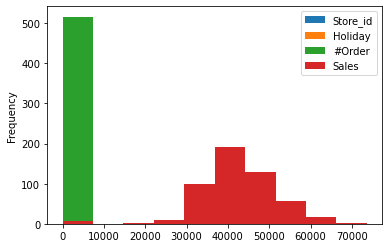

In [8]:
df.set_index('Date').groupby('Date').mean().plot.hist()

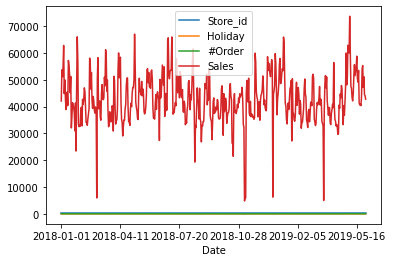

In [9]:
df.set_index('Date').groupby('Date').mean().plot.line()

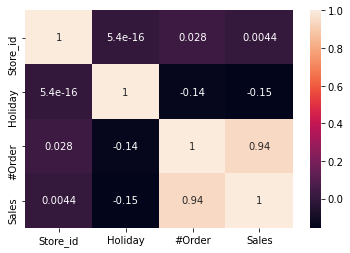

In [10]:
sns.heatmap(df.corr(),annot=True);

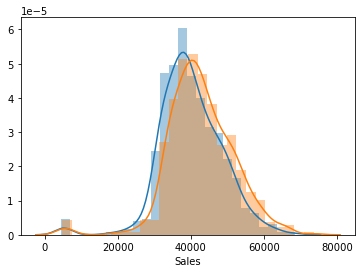

In [11]:
sns.distplot(df.set_index('Date').groupby('Date').median()['Sales'])
sns.distplot(df.set_index('Date').groupby('Date').mean()['Sales'])

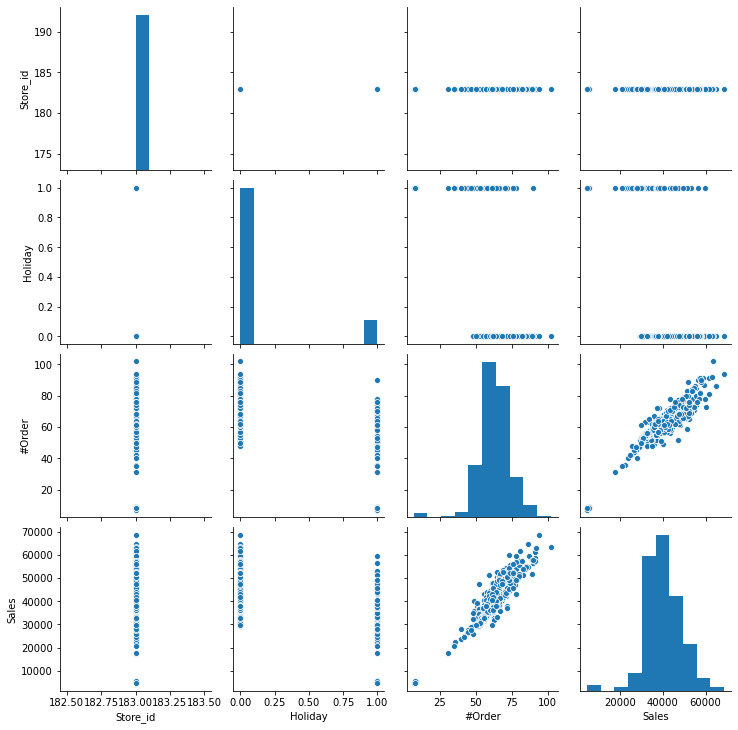

In [12]:
sns.pairplot(df.set_index('Date').groupby('Date').median())

In [13]:
#Processing Train.csv dataset in the required format to be fed in model
df_train=processdata_train(df)
df_train.head()
train,test=splitdataset(df_train)
X_train,y_train=getXYtrain(train,['Sales'])
X_test,y_test=getXYtrain(test,['Sales'])

<ipython-input-3-095cdd3eb217>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear


Shape of Train set :(150672, 39)
Shape of Test set :(37668, 39)
(150672, 38)
(150672, 1)
(37668, 38)
(37668, 1)


### Random Forest Regression

In [14]:
#Using Random Forest Regressor Model and checking RMSE and Accuracy
model_rf = RandomForestRegressor(n_estimators=100,max_depth=30, min_samples_leaf=0.002)
model_rf.fit(X_train, y_train)

<ipython-input-14-71e42cae4ebc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=0.002)

In [15]:
pred_train_tree= model_rf.predict(X_train)
print(f"RMSE on Train : {np.sqrt(mean_squared_error(y_train,pred_train_tree))}")
print(f"Accuracy :{r2_score(y_train, pred_train_tree)*100}")
print("MSLE *1000 : {}".format(mean_squared_log_error(y_train,pred_train_tree)*1000))
print("#################################")
pred_test_tree= model_rf.predict(X_test)
print(f"RMSE on Test :{np.sqrt(mean_squared_error(y_test,pred_test_tree))}") 
print(f"Accuracy :{r2_score(y_test, pred_test_tree)*100}")
print("MSLE *1000 : {}".format(mean_squared_log_error(y_test,pred_test_tree)*1000))

RMSE on Train : 10801.154938887305
Accuracy :64.39519549867055
MSLE *1000 : 89.4086574073317
#################################
RMSE on Test :13523.349893541814
Accuracy :53.39775493617442
MSLE *1000 : 124.76221464938955


### XGBoost Regression

In [16]:
xgb = XGBRegressor(n_estimators=50,max_depth=3)

In [17]:
xgb.fit(X_train, y_train)
pred_train_tree= xgb.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))
#print(mean_squared_log_error(y_train,pred_train_tree)*1000)
pred_test_tree= xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))
#print(mean_squared_log_error(y_test,pred_test_tree)*1000)

9851.91767955828
0.7037831479777353
13545.631359899033
0.5324406198507685


In [44]:
compare=pd.DataFrame(y_test,columns=['Actual'])
compare['Predicted']=pred_test_tree

In [45]:
compare.to_csv('Actual Vs Predicted.csv')